# <center> **DATA SCIENCE 2: ASSIGNMENT 2** 

### <center> *Ian Brandenburg (2304791)* <center> [GitHub Repo](https://github.com/Iandrewburg/Data_Science/tree/main/Data_Science_2/Assignments/Assignment_2)
---

    
Take the alternative version of the famous “MNIST dataset”, which consists of images of Zalando’s articles. Your task is to correctly classify the images into one of the ten categories, such as dress or shirt. The images are in exactly the same format as we saw for the handwritten digits: 28x28 pixel grayscale images. The task is to build deep neural network models to predict the items. You can use either sklearn or keras; to get the data, go to the corresponding Kaggle page or use the fashion_mnist.load_data() function from the keras.datasets module. Make sure you split the training set into two sets: one for training your models on and one for validation and model selection. You can work with a relatively small train set if you have computational problems.

#### 1. What would be an appropriate metric to evaluate your models? Why? 
---

An appropriate metric to evalute the models train on the Fashion MNIST data set would be the accuracy metric, since the dataset is a multi-class classification problem with balanced classes. The accuracy metric calculates the number of correctly predicted observations to the total number of observations. This provides a very straightforward assessment of the models' performance across the 10 different categories. 

#### 2. Get the data and show some example images from the data.
---

In [1]:
import numpy as np
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
# loading the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# preprocessing the data
# normalizing the images to have values between 0 and 1
# train_images = train_images / 255.0
# test_images = test_images / 255.0

# converting labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# splitting the training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=20240405)

# checking the shape of the datasets
print("Training set shape:", train_images.shape)
print("Validation set shape:", val_images.shape)
print("Test set shape:", test_images.shape)


Training set shape: (48000, 28, 28)
Validation set shape: (12000, 28, 28)
Test set shape: (10000, 28, 28)


In [6]:
print("Y Test set shape:", test_labels.shape)

Y Test set shape: (10000, 10)


Training Images:


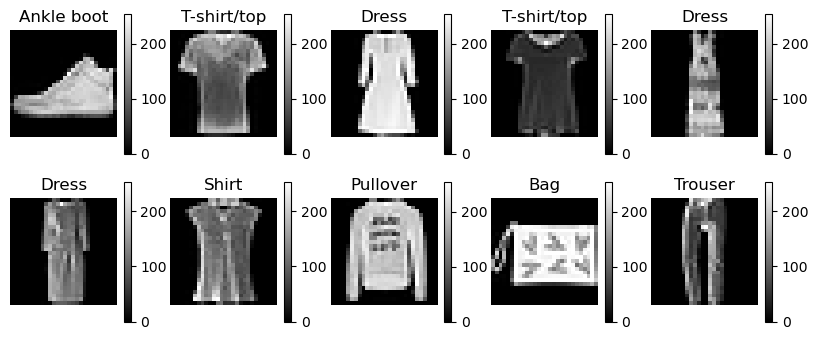

Validation Images:


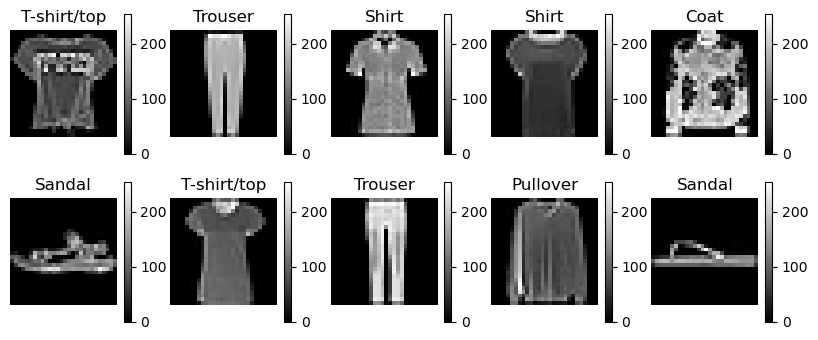

Test Images:


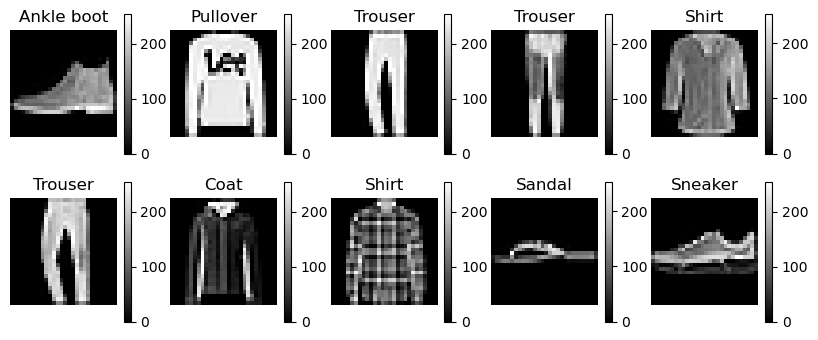

In [3]:
def show_images(images, labels, nrows=1, ncols=5, class_names=None):
    """Display a grid of images and their labels."""
    plt.figure(figsize=(10, 2 * nrows))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.colorbar()
        if class_names is not None:
            plt.title(class_names[np.argmax(labels[i])])
        else:
            plt.title(np.argmax(labels[i]))
        plt.axis('off')
    plt.show()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Assuming train_images, val_images, test_images are your datasets
# And train_labels, val_labels, test_labels are the corresponding labels

# Show some training images
print("Training Images:")
show_images(train_images, train_labels, nrows=2, ncols=5, class_names=class_names)

# Show some validation images
print("Validation Images:")
show_images(val_images, val_labels, nrows=2, ncols=5, class_names=class_names)

# Show some testing images
print("Test Images:")
show_images(test_images, test_labels, nrows=2, ncols=5, class_names=class_names)


#### 2 points) Train a simple fully connected single hidden layer network to predict the items. 

- Remember to normalize the data similar to what we did in class. Make sure that you use enough epochs so that the validation error begins to level off - provide a plot of the training history.

- NOTE: data was normalized after initializing the dataset. 

In [4]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Rescaling
from keras.callbacks import EarlyStopping

model = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),  # This layer scales input pixels to 0-1
    Flatten(),  # Convert 2D images to 1D vectors
    Dense(256, activation='relu'),  # Hidden layer with 256 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units (one for each class) and softmax activation
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

history = model.fit(train_images, 
                    train_labels, 
                    epochs=25, 
                    validation_data=(val_images, val_labels), 
                    callbacks=[EarlyStopping(monitor='val_accuracy', 
                                             patience=5)])


C:\Users\iandr\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7779 - loss: 0.6339 - val_accuracy: 0.8637 - val_loss: 0.3893
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8619 - loss: 0.3816 - val_accuracy: 0.8692 - val_loss: 0.3589
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8761 - loss: 0.3368 - val_accuracy: 0.8719 - val_loss: 0.3569
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8853 - loss: 0.3145 - val_accuracy: 0.8814 - val_loss: 0.3300
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8897 - loss: 0.2949 - val_accuracy: 0.8790 - val_loss: 0.3409
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8983 - loss: 0.2742 - val_accuracy: 0.8815 - val_loss: 0.3196
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9024 - loss: 0.2626 - val_accuracy: 0.8820 - val_loss: 0.3267
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9070 - loss: 0.25

The model above flattens the data, since we are looking at developing a fully connected hidden layer, subsequently converting the 2D images to 1D vectors. A hidden layer with 128 units was created, using ReLU activation. Finally, the moodel sets the output layer to 10 units (one for each category), and uses softmax activation on the output. 25 epochs were used to ensure the accuracy metric would level off. This was tested by using the EarlyStopping function with a patience of 5. It stops at 24 epochs with a validation accuracy of 0.8893. 

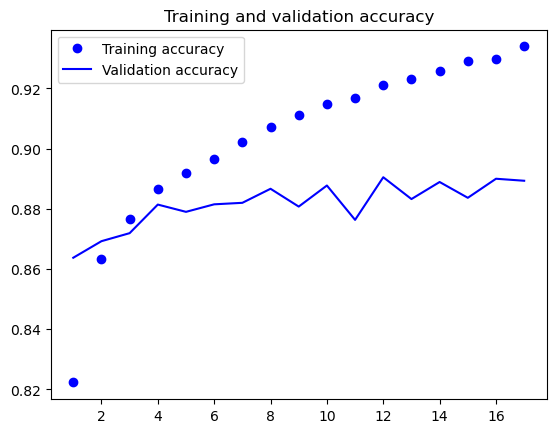

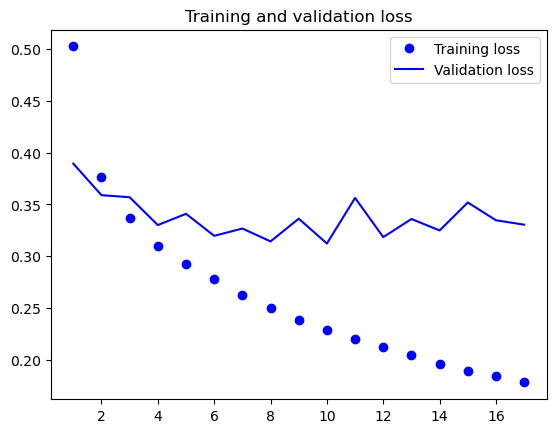

In [7]:
import matplotlib.pyplot as plt

# Assuming 'history' is the return value from model.fit()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training & validation accuracy values
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training & validation loss values
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Here, both the loss and accuracy metrics for the validation set level off before the training loss and accuracy.The training loss seems to still be decreasing while the accuracy increasing, at the time that the EarlyStopping function stops the epochs from running further. This would sugggest that the training set is not training the model well enough to fit the validation model. 

#### 6 points) Experiment with different network architectures and settings (number of hidden layers, number of nodes, regularization, etc.). 

- Train at least 3 models. Explain what you have tried and how it worked.

In [13]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Define model
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),  # Increased number of nodes
    Dense(10, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history1 = model1.fit(train_images, train_labels, epochs=25, validation_data=(val_images, val_labels), callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7190 - loss: 16.7487 - val_accuracy: 0.7966 - val_loss: 0.6122
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8065 - loss: 0.5763 - val_accuracy: 0.8175 - val_loss: 0.5623
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8267 - loss: 0.5104 - val_accuracy: 0.8343 - val_loss: 0.4776
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8325 - loss: 0.4798 - val_accuracy: 0.8280 - val_loss: 0.5157
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8346 - loss: 0.4778 - val_accuracy: 0.8023 - val_loss: 0.6553
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8360 - loss: 0.4836 - val_accuracy: 0.8230 - val_loss: 0.6006
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8418 - loss: 0.4759 - val_accuracy: 0.8306 - val_loss: 0.5188
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8452 - loss: 0.4514 -

In [14]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Define model
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history2 = model2.fit(train_images, train_labels, epochs=25, validation_data=(val_images, val_labels), callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5806 - loss: 14.7778 - val_accuracy: 0.6686 - val_loss: 0.7934
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5961 - loss: 1.1048 - val_accuracy: 0.6729 - val_loss: 0.9287
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5823 - loss: 1.1273 - val_accuracy: 0.6903 - val_loss: 0.8193
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5969 - loss: 1.0961 - val_accuracy: 0.7141 - val_loss: 0.7435
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5912 - loss: 1.0993 - val_accuracy: 0.7287 - val_loss: 0.7065
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6129 - loss: 1.0477 - val_accuracy: 0.6665 - val_loss: 0.8238
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5991 - loss: 1.0958 - val_accuracy: 0.7225 - val_loss: 0.8056
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6237 - loss: 1.0513 -

In [15]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Define model
model3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),  # Additional hidden layer
    Dense(10, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history3 = model3.fit(train_images, train_labels, epochs=25, validation_data=(val_images, val_labels), callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7090 - loss: 7.9162 - val_accuracy: 0.7903 - val_loss: 0.6905
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7989 - loss: 0.6366 - val_accuracy: 0.8122 - val_loss: 0.5823
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8133 - loss: 0.5536 - val_accuracy: 0.8100 - val_loss: 0.5558
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8302 - loss: 0.4921 - val_accuracy: 0.8282 - val_loss: 0.4982
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8389 - loss: 0.4523 - val_accuracy: 0.8376 - val_loss: 0.4558
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8487 - loss: 0.4186 - val_accuracy: 0.8421 - val_loss: 0.4502
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8548 - loss: 0.3989 - val_accuracy: 0.8420 - val_loss: 0.4586
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8613 - loss: 0.3791 - 

In [18]:
# Define model
model4 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Flatten(),
    Dense(512, activation='relu'),  # Increased number of nodes
    Dropout(0.5),  # Add dropout
    Dense(512, activation='relu'),  # Increased number of nodes
    Dropout(0.5),  # Add dropout
    Dense(10, activation='softmax')
])

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history4 = model4.fit(train_images, train_labels, epochs=25, validation_data=(val_images, val_labels), callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7134 - loss: 0.8001 - val_accuracy: 0.8438 - val_loss: 0.4360
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8164 - loss: 0.5118 - val_accuracy: 0.8458 - val_loss: 0.4120
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8297 - loss: 0.4730 - val_accuracy: 0.8552 - val_loss: 0.4000
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8384 - loss: 0.4452 - val_accuracy: 0.8616 - val_loss: 0.3773
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8436 - loss: 0.4328 - val_accuracy: 0.8603 - val_loss: 0.3812
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8461 - loss: 0.4215 - val_accuracy: 0.8675 - val_loss: 0.3677
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8513 - loss: 0.4119 - val_accuracy: 0.8696 - val_loss: 0.3562
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8564 - loss: 0.3964 - 

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model5 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),  # Reduced number of nodes
    BatchNormalization(),  # Add batch normalization
    Dropout(0.3),  # Reduced dropout rate
    Dense(256, activation='relu'),  # Reduced number of nodes
    BatchNormalization(),  # Add batch normalization
    Dropout(0.3),  # Reduced dropout rate
    Dense(10, activation='softmax')
])

model5.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Assuming you have defined train_images, train_labels, val_images, val_labels
history5 = model5.fit(train_images, train_labels, epochs=25, validation_data=(val_images, val_labels),
                      callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7428 - loss: 0.7486 - val_accuracy: 0.8327 - val_loss: 0.4969
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8247 - loss: 0.4912 - val_accuracy: 0.8519 - val_loss: 0.6113
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8428 - loss: 0.4454 - val_accuracy: 0.8510 - val_loss: 0.4157
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8432 - loss: 0.4364 - val_accuracy: 0.8644 - val_loss: 0.4231
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8536 - loss: 0.4060 - val_accuracy: 0.8611 - val_loss: 0.4216
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8550 - loss: 0.4024 - val_accuracy: 0.8663 - val_loss: 0.3762
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8573 - loss: 0.3938 - val_accuracy: 0.8717 - val_loss: 0.3694
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8596 - loss: 0.3835 - 

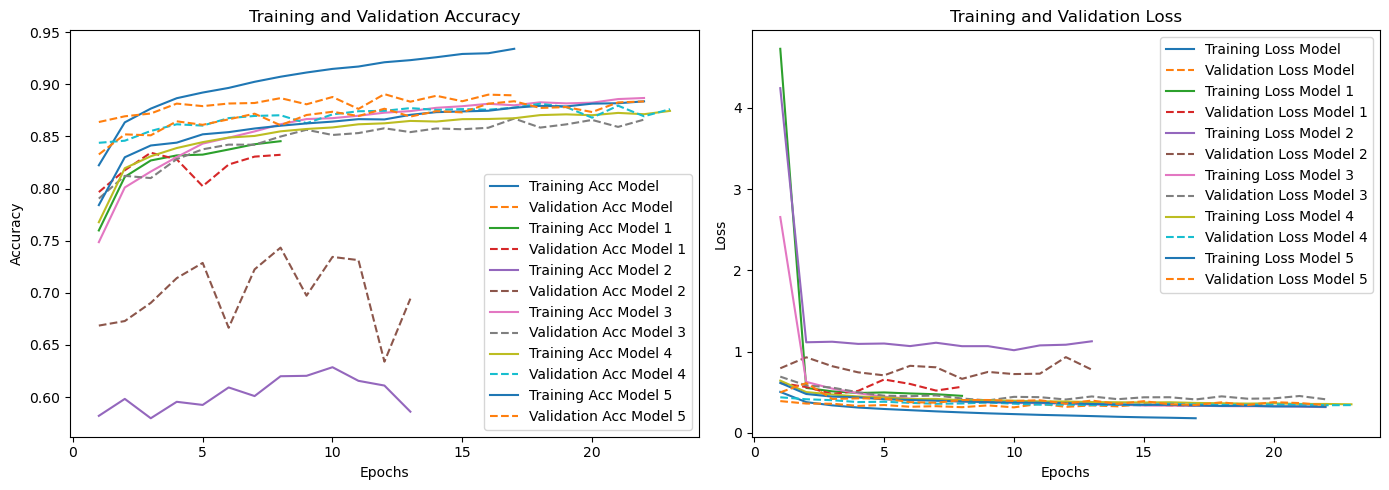

In [21]:
import matplotlib.pyplot as plt

def plot_model_history(model_histories, labels):
    """Plot the training and validation accuracy and loss for multiple models."""
    if not model_histories or not labels or len(model_histories) != len(labels):
        print("The model histories and labels must be provided and match in length.")
        return

    plt.figure(figsize=(14, 5))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    for model_history, label in zip(model_histories, labels):
        epochs = range(1, len(model_history.history['accuracy']) + 1)
        plt.plot(epochs, model_history.history['accuracy'], label=f'Training Acc {label}')
        plt.plot(epochs, model_history.history['val_accuracy'], label=f'Validation Acc {label}', linestyle="--")
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    for model_history, label in zip(model_histories, labels):
        epochs = range(1, len(model_history.history['loss']) + 1)
        plt.plot(epochs, model_history.history['loss'], label=f'Training Loss {label}')
        plt.plot(epochs, model_history.history['val_loss'], label=f'Validation Loss {label}', linestyle="--")
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming history1, history2, history3 are the history objects from training models 1, 2, and 3
plot_model_history([history, history1, history2, history3, history4, history5], ['Model', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'])


In [1]:
plot_model_history([history], ['Model 0'])


NameError: name 'plot_model_history' is not defined

#### 6 points) Try to improve the accuracy of your model by using convolution. 
- Train at least two different models (you can vary the number of convolutional and pooling layers or whether you include a fully connected layer before the output, etc.).

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling

model6 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),  # Scale input pixels to 0-1
    Conv2D(32, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Pooling layer
    Flatten(),  # Convert 3D feature maps to 1D feature vectors
    Dense(256, activation='relu'),  # Hidden layer
    Dense(10, activation='softmax')  # Output layer
])

model6.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

print(model6.summary())

# Assuming train_images, train_labels, val_images, val_labels are correctly shaped for a CNN
history6 = model6.fit(train_images, train_labels, epochs=25,
                      validation_data=(val_images, val_labels),
                      callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,387,594 (5.29 MB)

 Trainable params: 1,387,594 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8152 - loss: 0.5313 - val_accuracy: 0.8894 - val_loss: 0.3086
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9028 - loss: 0.2690 - val_accuracy: 0.9028 - val_loss: 0.2619
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9202 - loss: 0.2171 - val_accuracy: 0.9124 - val_loss: 0.2399
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9338 - loss: 0.1801 - val_accuracy: 0.9118 - val_loss: 0.2429
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9446 - loss: 0.1512 - val_accuracy: 0.9090 - val_loss: 0.2526
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9566 - loss: 0.1214 - val_accuracy: 0.9070 - val_loss: 0.2722
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9620 - loss: 0.1017 - val_accuracy: 0.9161 - val_loss: 0.2602
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9

In [33]:
from tensorflow.keras.layers import Dropout

model7 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),  # Increase the number of filters
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),  # Additional convolutional layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),  # Smaller dense layer before output
    Dropout(0.5),  # Include dropout
    Dense(10, activation='softmax')
])

model7.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

print(model7.summary())

history7 = model7.fit(train_images, train_labels, epochs=25,
                      validation_data=(val_images, val_labels),
                      callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7115 - loss: 0.7997 - val_accuracy: 0.8598 - val_loss: 0.3756
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8532 - loss: 0.4060 - val_accuracy: 0.8802 - val_loss: 0.3183
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8757 - loss: 0.3426 - val_accuracy: 0.8939 - val_loss: 0.2843
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8892 - loss: 0.3098 - val_accuracy: 0.8991 - val_loss: 0.2720
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8980 - loss: 0.2825 - val_accuracy: 0.9027 - val_loss: 0.2553
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9071 - loss: 0.2575 - val_accuracy: 0.9090 - val_loss: 0.2477
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9103 - loss: 0.2458 - val_accuracy: 0.9095 - val_loss: 0.2443
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9172 - 

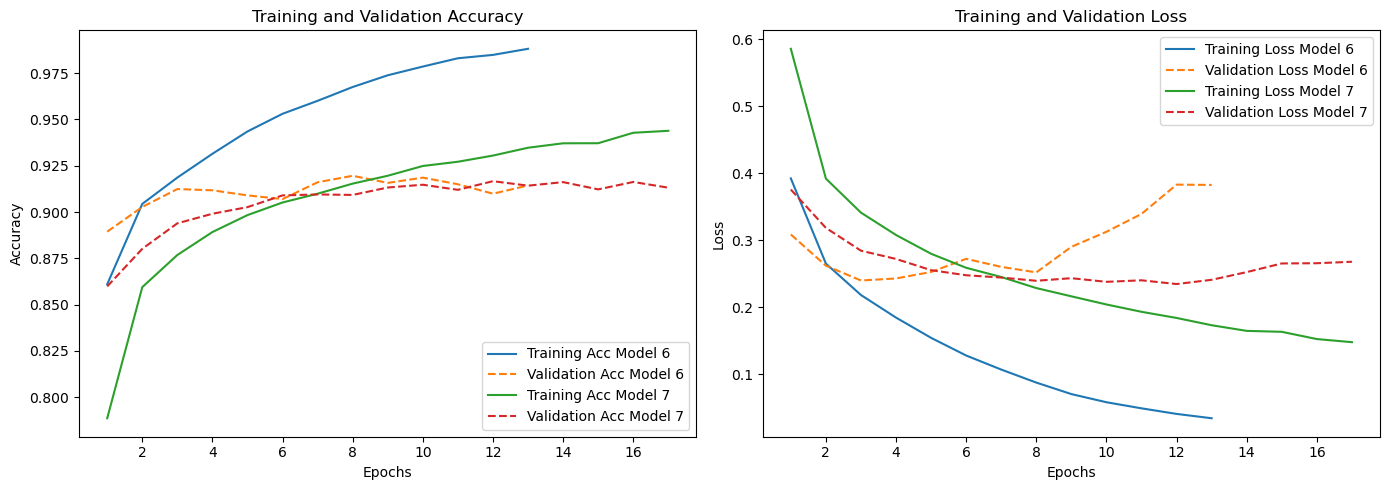

In [34]:
plot_model_history([history6, history7], ['Model 6', 'Model 7'])

#### (Optional for 5 points) Try to use a pre-trained network to improve accuracy.

Note to self, I think we used this in class? Not 100% sure, but this might be referncing the one we used in the class. 

#### 2 points) Select a final model and evaluate it on the test set. How does the test error compare to the validation error?